In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import torchvision.models
import torchvision.transforms

In [3]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
Y = numeros['target']
print(np.shape(imagenes), np.shape(Y))

(1797, 8, 8) (1797,)


In [4]:

train = torch.autograd.Variable(torch.Tensor(imagenes).float())
targets = torch.autograd.Variable(torch.Tensor(Y).long())
mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)
x_train = train.unsqueeze(1)
np.shape(x_train)

torch.Size([1797, 1, 8, 8])

In [5]:
n = torch.nn.Conv2d(1, 20, kernel_size=4, stride=1) # in-channels = 1, out-channels = 10, kernel=4
new_tensor = n(x_train)
print(new_tensor.size())
n = torch.nn.Conv2d(20,14,kernel_size=2)
feature_maps = n(new_tensor)
print(feature_maps.size())
n = torch.nn.Conv2d(14,8,kernel_size=1)
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.Conv2d(8,4,kernel_size=1)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ConvTranspose2d(4,8,kernel_size=1)
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.ConvTranspose2d(8,14,kernel_size=3)
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.ConvTranspose2d(14,20,kernel_size=3)
feature_maps = n(feature_maps)
print(feature_maps.size())
n = torch.nn.ConvTranspose2d(20,1,kernel_size=1, stride=1)
feature_maps = n(feature_maps)
print(feature_maps.size())

torch.Size([1797, 20, 5, 5])
torch.Size([1797, 14, 4, 4])
torch.Size([1797, 8, 4, 4])
torch.Size([1797, 4, 4, 4])
torch.Size([1797, 8, 4, 4])
torch.Size([1797, 14, 6, 6])
torch.Size([1797, 20, 8, 8])
torch.Size([1797, 1, 8, 8])


In [8]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self,i):
        super(Autoencoder,self).__init__()
        # 2 capas, Con el que tuve exito el ejercicio pasado
        if i == 1:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=4, stride=1),
                torch.nn.Conv2d(16,6,kernel_size=3))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(6,16,kernel_size=3),
                torch.nn.ConvTranspose2d(16,1,kernel_size=4, stride=1))
        # 3 capas, con el que Jaime hizo el ejemplo
        elif i == 2:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=3),
                torch.nn.Conv2d(16,8,kernel_size=3),
                torch.nn.Conv2d(8,4,kernel_size=3))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(4,8,kernel_size=3),
                torch.nn.ConvTranspose2d(8,16,kernel_size=3),
                torch.nn.ConvTranspose2d(16,1,kernel_size=3))
        # 2 capas con una menor dimensionalidad que el modelo 1
        elif i == 3:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=4, stride=1),
                torch.nn.Conv2d(16,6,kernel_size=2))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(6,16,kernel_size=1),
                torch.nn.ConvTranspose2d(16,1,kernel_size=5, stride=1))
        # 2 capas intentando algo tranquilo
        elif i == 4:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=4, stride=1),
                torch.nn.Conv2d(16,6,kernel_size=3))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(6,16,kernel_size=3),
                torch.nn.ConvTranspose2d(16,1,kernel_size=4, stride=1))
        # 2 capas
        elif i == 5:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=5, stride=2),
                torch.nn.Conv2d(16,6,kernel_size=2))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(6,16,kernel_size=2),
                torch.nn.ConvTranspose2d(16,1,kernel_size=4, stride=4))
        # 3 capas
        elif i == 6:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 20, kernel_size=4, stride=1),
                torch.nn.Conv2d(20,10,kernel_size=1),
                torch.nn.Conv2d(10,4,kernel_size=1))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(4,10,kernel_size=2),
                torch.nn.ConvTranspose2d(10,20,kernel_size=2),
                torch.nn.ConvTranspose2d(20,1,kernel_size=2, stride=1))
        # 2 capas con la funcion de ReLu intermedia 
        elif i == 7:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=4, stride=1),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(16,6,kernel_size=3),
                torch.nn.ReLU(True))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(6,16,kernel_size=3),
                torch.nn.ReLU(True),
                torch.nn.ConvTranspose2d(16,1,kernel_size=4, stride=1),
                torch.nn.ReLU(True))
        # 3 capas, con el que Jaime hizo el ejemplo, ReLu intermedio
        elif i == 8:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 16, kernel_size=3),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(16,8,kernel_size=3),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(8,4,kernel_size=3),
                torch.nn.ReLU(True))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(4,8,kernel_size=3),
                torch.nn.ReLU(True),
                torch.nn.ConvTranspose2d(8,16,kernel_size=3),
                torch.nn.ReLU(True),
                torch.nn.ConvTranspose2d(16,1,kernel_size=3),
                torch.nn.ReLU(True))
            
        # 4 capas, de no se que esta pasando, 
        elif i == 9:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 20, kernel_size=4, stride=1),
                torch.nn.Conv2d(20,14,kernel_size=2),
                torch.nn.Conv2d(14,8,kernel_size=2),
                torch.nn.Conv2d(8,4,kernel_size=1))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(4,8,kernel_size=2),
                torch.nn.ConvTranspose2d(8,14,kernel_size=3),
                torch.nn.ConvTranspose2d(14,20,kernel_size=2),
                torch.nn.ConvTranspose2d(20,1,kernel_size=2, stride=1))
            
        # 4, de tampoco se nada
        else:
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 20, kernel_size=4, stride=1),
                torch.nn.Conv2d(20,14,kernel_size=2),
                torch.nn.Conv2d(14,8,kernel_size=1),
                torch.nn.Conv2d(8,4,kernel_size=1))
            self.decoder = torch.nn.Sequential(             
                torch.nn.ConvTranspose2d(4,8,kernel_size=1),
                torch.nn.ConvTranspose2d(8,14,kernel_size=3),
                torch.nn.ConvTranspose2d(14,20,kernel_size=3),
                torch.nn.ConvTranspose2d(20,1,kernel_size=1, stride=1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [13]:
arr_n_p = np.zeros(10)
arr_n_l = np.zeros(10)
loss_arr = np.zeros(10)
for i in range(10):
    # inicializa modelo, loss y optimizador
    num_epochs = 100
    num_model = i+1
    model = Autoencoder(num_model)
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)
    for epoch in range(num_epochs):
        output = model(x_train)
        loss = distance(output, x_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    x_transform = model(x_train)
    loss = distance(x_transform, x_train)
    loss_arr[i] = loss.item()
    n_p = 0
    for m in model.parameters():
        n_p += m.flatten().size()[0]
    arr_n_p[i] = n_p
    latent_space = model.encoder(x_train)
    arr_n_l[i] = latent_space.size()[3]
    print(i)

0
1
2
3
4
5
6
7
8
9


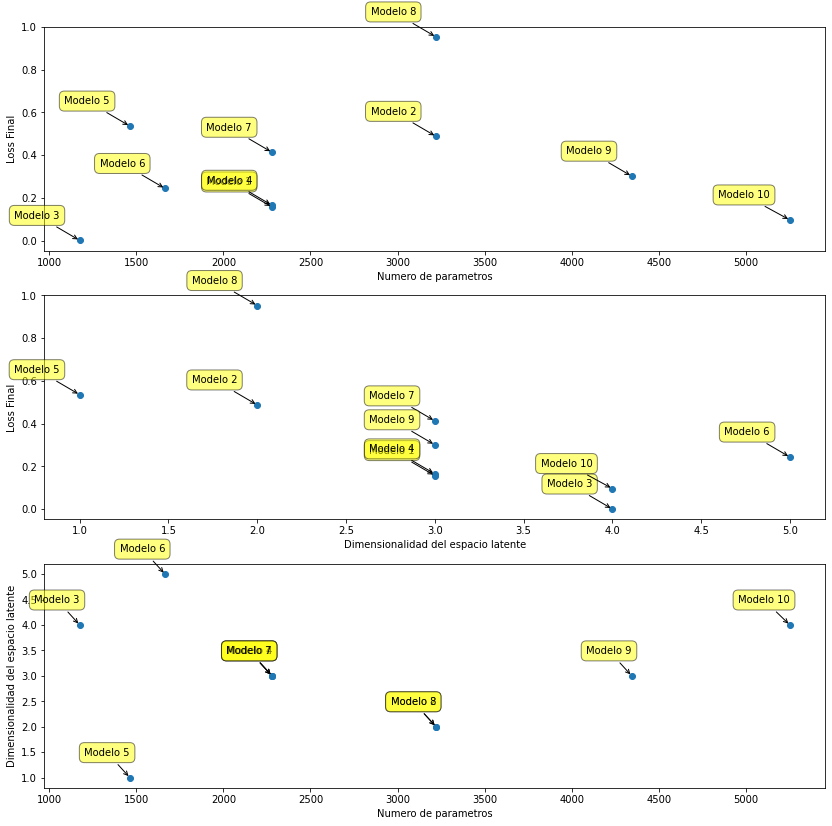

In [15]:
plt.figure(figsize=(14,14))
plt.subplot(3,1,1)
labels = ['Modelo {0}'.format(i+1) for i in range(10)]
plt.scatter(arr_n_p, loss_arr)
plt.xlabel('Numero de parametros')
plt.ylabel('Loss Final')

for label, x, y in zip(labels, arr_n_p, loss_arr):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.subplot(3,1,2)
plt.scatter(arr_n_l, loss_arr)
plt.xlabel('Dimensionalidad del espacio latente')
plt.ylabel('Loss Final')

for label, x, y in zip(labels, arr_n_l, loss_arr):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.subplot(3,1,3)
plt.scatter(arr_n_p, arr_n_l)
plt.xlabel('Numero de parametros')
plt.ylabel('Dimensionalidad del espacio latente')
for label, x, y in zip(labels, arr_n_p, arr_n_l):
    plt.annotate(label, xy=(x, y), xytext=(0, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


El resultado de la ultima celda es la visualizacion en la que podemos ver que el modelo 3 parece tener los mejores resultados, con un Loss menor teniendo pocos parametros y un espacio latente de dimension 4. 
Este modelo corresponde a uno simple de 2 capas. Este experimento hace pensar que el numero mas importante es el de la dimensionalidad del espacio latente.